<a href="https://colab.research.google.com/github/Archana-2024/Task4-Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Amazon Reviews Analysis(Sentiment Analysis)**

In [4]:
#Import Required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import nltk

plt.style.use('ggplot')

In [5]:
df = pd.read_csv('/content/Reviews.csv', encoding='latin1', on_bad_lines='skip') #Load the data and read


In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df.shape

(8187, 10)

In [8]:
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,0
Text,0


In [9]:
df.dropna()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
8182,8183,B000RY8Z88,A2X1VX3BI2MLZL,D. Wilcox,1,1,5,1279065600,Amazing stuff!,I grew up in upstate NY where this stuff was b...
8183,8184,B000RY8Z88,A3MEWWXP9I5Q9U,Razztjazz,0,0,5,1279411200,Yummy,I love this stuff. My dad brought some home f...
8184,8185,B0001GV57U,A1WQ14J1BP5RY,Robin P. Peek Miller,0,0,5,1348617600,Two Favorite Food Groups,I love chipotle. Back here in MA when I live n...
8185,8186,B0032GRU16,AGFEBA922M3IF,JimmyFitz,0,0,5,1343174400,Good Energy,This energy drink has worked for me. I drink o...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8187 entries, 0 to 8186
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      8187 non-null   int64 
 1   ProductId               8187 non-null   object
 2   UserId                  8187 non-null   object
 3   ProfileName             8187 non-null   object
 4   HelpfulnessNumerator    8187 non-null   int64 
 5   HelpfulnessDenominator  8187 non-null   int64 
 6   Score                   8187 non-null   int64 
 7   Time                    8187 non-null   int64 
 8   Summary                 8187 non-null   object
 9   Text                    8187 non-null   object
dtypes: int64(5), object(5)
memory usage: 639.7+ KB


In [11]:
print(df['Time'].unique())

[1303862400 1346976000 1219017600 ... 1144540800 1268697600 1169078400]


In [12]:

df['Time'] = pd.to_datetime(df['Time'], unit='s')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8187 entries, 0 to 8186
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Id                      8187 non-null   int64         
 1   ProductId               8187 non-null   object        
 2   UserId                  8187 non-null   object        
 3   ProfileName             8187 non-null   object        
 4   HelpfulnessNumerator    8187 non-null   int64         
 5   HelpfulnessDenominator  8187 non-null   int64         
 6   Score                   8187 non-null   int64         
 7   Time                    8187 non-null   datetime64[ns]
 8   Summary                 8187 non-null   object        
 9   Text                    8187 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 639.7+ KB


In [14]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


**Calculate count of reviews**

In [15]:

df['Score'].value_counts()

,count
Score,
5,5118
4,1155
1,749
3,690
2,475


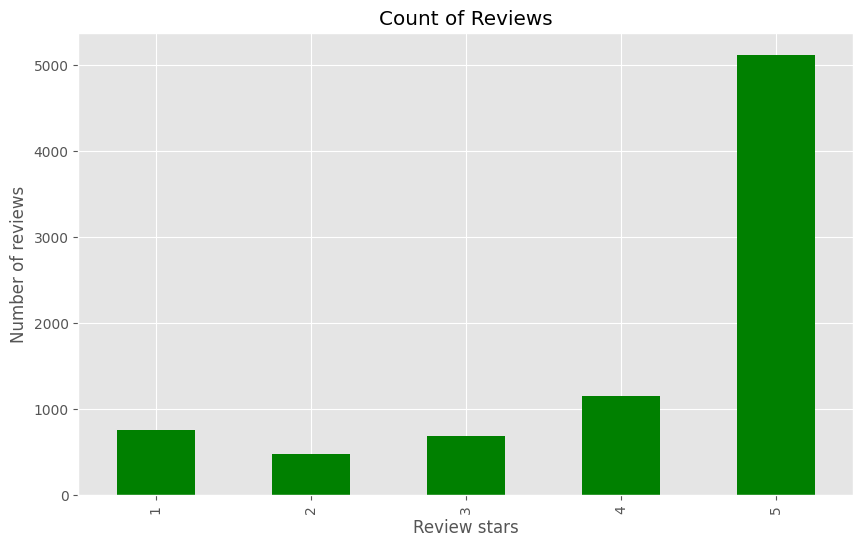

In [16]:
Stars_count=df['Score'].value_counts().sort_index()
Stars_count.plot(kind='bar',title='Count of Reviews',figsize=(10,6),color='green')
plt.xlabel('Review stars')
plt.ylabel('Number of reviews')
plt.show()

In [17]:
# Simplify sentiment labels
def assign_sentiment(score):
    if score in [4, 5]:
        return 'positive'
    elif score == 3:
        return 'neutral'
    elif score in [1, 2]:
        return 'negative'

df['Sentiment'] = df['Score'].apply(assign_sentiment)


Sentiment Distribution:
Sentiment
positive    6273
negative    1224
neutral      690
Name: count, dtype: int64


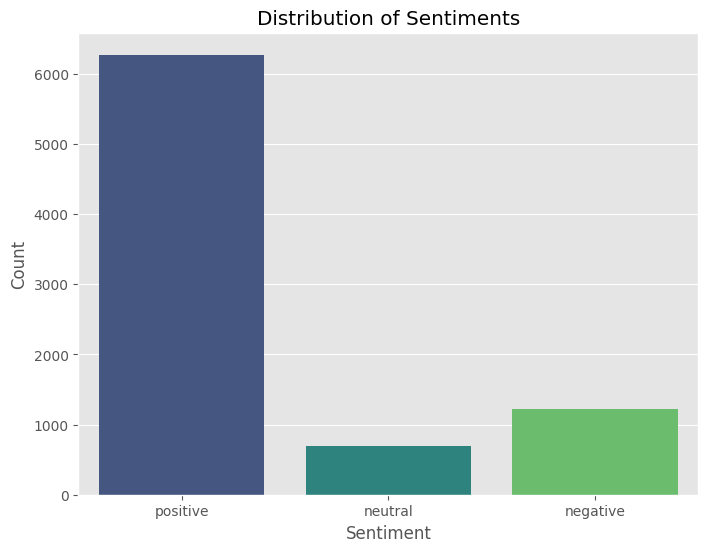

In [18]:
# Verify sentiment distribution
print("\nSentiment Distribution:")
print(df['Sentiment'].value_counts())

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment', palette='viridis', order=['positive', 'neutral', 'negative'])
plt.title("Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

**VADER Seniment Scoring-**


We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

In [23]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Download the VADER lexicon (only needs to be done once)
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [24]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/8187 [00:00<?, ?it/s]

In [25]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [27]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,positive
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,negative
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,positive


# **Vader analysis using plots**

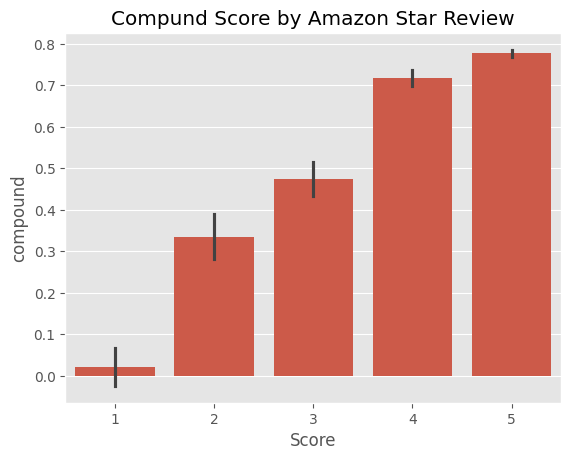

In [26]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

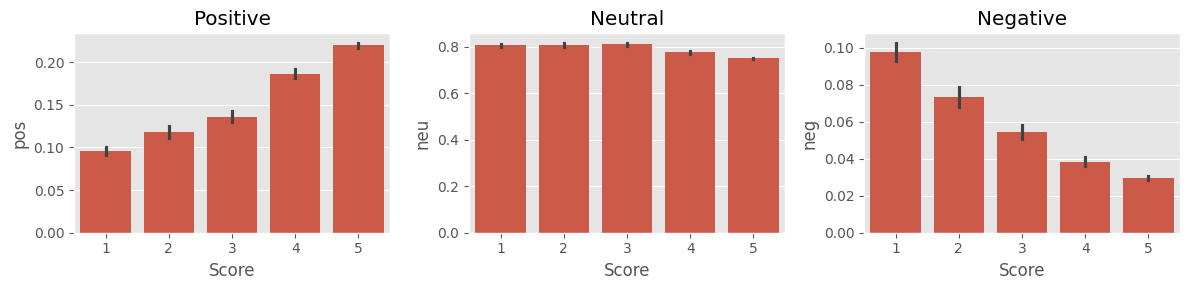

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()